# Load packages.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the dataset for this chunk (3/10).
Chunk 1 used for fine tuning.

In [3]:
df = pd.read_csv('C:/Users/rmcarri/OneDrive - Emory University/NHANES/Macronutrients LLMs/03.Results/Adolescents/FT 10epochs v2/df_val_with_answers_chunk3.csv')
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
0,0,32423,2,"MILK, COW'S, FLUID, WHOLE (488); MILK, COW'S, ...",2577,119.04,314.28,131.02,18.3,94.12,...,1,5.00,NaN,1.0,0.0,0.0,NaN,32423_NHANES_2005_2006,2577; 119.04; 314.28; 131.02; 18.3; 94.12,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1,1,32427,2,"CHEESE, NATURAL, CHEDDAR OR AMERICAN TYPE (28....",1808,63.92,212.84,50.89,12.1,78.90,...,1,1.24,NaN,0.0,0.0,0.0,NaN,32427_NHANES_2005_2006,1808; 63.92; 212.84; 50.89; 12.1; 78.9,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
2,2,32431,2,"CHICKEN/TURKEY LOAF, PREPACK/DELI, LUNCHEON ME...",966,36.46,170.10,104.57,3.8,15.77,...,4,0.88,NaN,0.0,0.0,NaN,NaN,32431_NHANES_2005_2006,966; 36.46; 170.1; 104.57; 3.8; 15.77,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
3,3,32434,2,"MILK, COW'S, FLUID, WHOLE (244); FRANKFURTER, ...",1894,43.68,273.48,170.47,10.4,72.49,...,1,0.43,NaN,0.0,0.0,NaN,NaN,32434_NHANES_2005_2006,1894; 43.68; 273.48; 170.47; 10.4; 72.49,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
4,4,32438,2,"MILK, COW'S, FLUID, WHOLE (350.75); MILK, COW'...",2559,75.65,362.86,240.52,9.5,93.40,...,3,3.50,NaN,0.0,0.0,0.0,NaN,32438_NHANES_2005_2006,2559; 75.65; 362.86; 240.52; 9.5; 93.4,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,38380,2,"MILK, COW'S, FLUID, 2% FAT (244); PUDDING, CAN...",1960,47.60,246.24,122.39,9.0,89.27,...,2,3.87,NaN,0.0,0.0,0.0,NaN,38380_NHANES_2005_2006,1960; 47.6; 246.24; 122.39; 9.0; 89.27,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1124,1124,38381,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (888.13); M...",5052,135.57,638.05,351.39,18.5,230.47,...,3,0.12,NaN,0.0,0.0,0.0,NaN,38381_NHANES_2005_2006,5052; 135.57; 638.05; 351.39; 18.5; 230.47,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1125,1125,38385,2,"MILK, CHOCOLATE, RED FAT, 2% (250); CHICKEN, B...",1538,72.84,187.14,66.52,8.5,55.24,...,3,1.06,NaN,0.0,0.0,NaN,NaN,38385_NHANES_2005_2006,1538; 72.84; 187.14; 66.52; 8.5; 55.24,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1126,1126,38391,2,"MILK, COW'S, FLUID, 2% FAT (244); CHEESE, CREA...",2568,107.61,351.06,137.18,12.6,82.87,...,3,3.73,NaN,0.0,0.0,NaN,NaN,38391_NHANES_2005_2006,2568; 107.61; 351.06; 137.18; 12.6; 82.87,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...


# The output from the fine tuned model needs post-processing.
Post-process the output of the fine-tuned model.

Verify the new (post-processed) output is accurate.

Drop rows that cannot be post-processed (i.e., in a completely wrong format or did not yield the desired information).

In [5]:
# Post-process the LLM_Fine_Tuned content
def extract_numbers_after_response(text):
    response_section = text.split("### Response:")[-1].strip()   # Find everything after "### Response:"
    return "; ".join(response_section.split(";"))   # Extract the numbers and join them with semicolons

# Apply the function to your DataFrame column
df['LLM_Fine_Tuned'] = df['LLM_Fine_Tuned'].apply(extract_numbers_after_response)

In [6]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_Fine_Tuned'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}. I.e., these rows need post-processing.")
print(f"Consistent rows: {sum(mask)}. I.e., all rows are as expected, not need to post-process.")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1128
Inconsistent rows: 56. I.e., these rows need post-processing.
Consistent rows: 1072. I.e., all rows are as expected, not need to post-process.


,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
25,25,32519,2,"MILK, COW'S, FLUID, 2% FAT (244); CHEESE, PROC...",1642,45.62,268.47,125.96,23.5,42.91,...,4,2.99,NaN,0.0,0.0,NaN,NaN,32519_NHANES_2005_2006,1642; 45.62; 268.47; 125.96; 23.5; 42.91,USER:\n\nPlease analyze the patient's dietary ...
29,29,32538,2,"BEEF & VEG (W/ CAR/DK GREEN, NO POTATO), SOY S...",1046,40.79,153.19,54.60,9.1,29.98,...,5,3.75,NaN,0.0,0.0,NaN,NaN,32538_NHANES_2005_2006,1046; 40.79; 153.19; 54.6; 9.1; 29.98,USER:\n\nPlease analyze the patient's dietary ...
34,34,32594,2,"MILK, COW'S, FLUID, WHOLE (198.25); CHEESE, MO...",4148,192.01,397.82,156.28,22.1,201.55,...,2,5.00,NaN,0.0,0.0,0.0,NaN,32594_NHANES_2005_2006,4148; 192.01; 397.82; 156.28; 22.1; 201.55,USER:\n\nPlease analyze the patient's dietary ...
44,44,32645,2,"MILK, COW'S, FLUID, 2% FAT (244); CHICKEN, NS ...",1156,31.71,186.71,110.85,10.5,32.69,...,1,0.88,NaN,0.0,0.0,0.0,NaN,32645_NHANES_2005_2006,1156; 31.71; 186.71; 110.85; 10.5; 32.69,USER:\n\nPlease analyze the patient's dietary ...
60,60,32737,2,"MILK, COW'S, FLUID, 1% FAT (320.25); CHEESE, N...",721,30.73,112.44,63.78,3.1,17.43,...,2,0.21,NaN,0.0,0.0,NaN,NaN,32737_NHANES_2005_2006,721; 30.73; 112.44; 63.78; 3.1; 17.43,USER:\n\nPlease analyze the patient's dietary ...
80,80,32815,2,"SOUR CREAM, REDUCED FAT (124); BACON, NS AS TO...",3574,109.06,464.38,221.50,13.7,148.77,...,4,5.00,NaN,0.0,0.0,0.0,NaN,32815_NHANES_2005_2006,3574; 109.06; 464.38; 221.5; 13.7; 148.77,USER:\n\nPlease analyze the patient's dietary ...
90,90,32867,2,"MILK, COW'S, FLUID, 2% FAT (183); CAKE,CHOC,DE...",3162,32.87,562.42,422.40,11.5,99.74,...,1,NaN,NaN,0.0,0.0,0.0,NaN,32867_NHANES_2005_2006,3162; 32.87; 562.42; 422.4; 11.5; 99.74,USER:\n\nPlease analyze the patient's dietary ...
139,139,33079,2,"CHEESE, NATURAL, CHEDDAR OR AMERICAN TYPE (28....",3634,232.02,342.76,127.39,25.7,149.53,...,4,3.75,NaN,0.0,0.0,0.0,NaN,33079_NHANES_2005_2006,3634; 232.02; 342.76; 127.39; 25.7; 149.53,USER:\n\nPlease analyze the patient's dietary ...
170,170,33215,2,"ICE CREAM BAR OR STICK, NOT CHOC- OR CAKE-COVE...",1896,61.76,220.54,87.87,12.2,89.51,...,1,NaN,NaN,0.0,0.0,0.0,NaN,33215_NHANES_2005_2006,1896; 61.76; 220.54; 87.87; 12.2; 89.51,USER:\n\nPlease analyze the patient's dietary ...
171,171,33219,2,"MILK, COW'S, FLUID, WHOLE (198.25); MILK, COW'...",1777,43.99,304.61,219.67,10.5,45.73,...,1,1.34,NaN,0.0,0.0,0.0,NaN,33219_NHANES_2005_2006,1777; 43.99; 304.61; 219.67; 10.5; 45.73,USER:\n\nPlease analyze the patient's dietary ...


In [7]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1072, 23)

# Create the variables (columns) for the predicted energy and macronutrients.
From the fine-tuned model.

In [9]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_Fine_Tuned'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,smoker,id,Expected_Output,LLM_Fine_Tuned,DRxIKCAL_pred_ft,DRxIPROT_pred_ft,DRxICARB_pred_ft,DRxISUGR_pred_ft,DRxIFIBE_pred_ft,DRxITFAT_pred_ft
0,0,32423,2,"MILK, COW'S, FLUID, WHOLE (488); MILK, COW'S, ...",2577,119.04,314.28,131.02,18.3,94.12,...,NaN,32423_NHANES_2005_2006,2577; 119.04; 314.28; 131.02; 18.3; 94.12,2631; 120.78; 341.1; 133.1; 18.9; 84.7,2631,120.78,341.10,133.10,18.9,84.70
1,1,32427,2,"CHEESE, NATURAL, CHEDDAR OR AMERICAN TYPE (28....",1808,63.92,212.84,50.89,12.1,78.90,...,NaN,32427_NHANES_2005_2006,1808; 63.92; 212.84; 50.89; 12.1; 78.9,1931; 74.82; 231.1; 60.1; 15.6; 78.09,1931,74.82,231.10,60.10,15.6,78.09
2,2,32431,2,"CHICKEN/TURKEY LOAF, PREPACK/DELI, LUNCHEON ME...",966,36.46,170.10,104.57,3.8,15.77,...,NaN,32431_NHANES_2005_2006,966; 36.46; 170.1; 104.57; 3.8; 15.77,1136; 46.82; 186.1; 114.89; 4.0; 23.6,1136,46.82,186.10,114.89,4.0,23.60
3,3,32434,2,"MILK, COW'S, FLUID, WHOLE (244); FRANKFURTER, ...",1894,43.68,273.48,170.47,10.4,72.49,...,NaN,32434_NHANES_2005_2006,1894; 43.68; 273.48; 170.47; 10.4; 72.49,1975; 50.8; 330.91; 149.6; 17.6; 53.6,1975,50.80,330.91,149.60,17.6,53.60
4,4,32438,2,"MILK, COW'S, FLUID, WHOLE (350.75); MILK, COW'...",2559,75.65,362.86,240.52,9.5,93.40,...,NaN,32438_NHANES_2005_2006,2559; 75.65; 362.86; 240.52; 9.5; 93.4,2971; 76.15; 427.86; 269.1; 9.7; 108.1,2971,76.15,427.86,269.10,9.7,108.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,38380,2,"MILK, COW'S, FLUID, 2% FAT (244); PUDDING, CAN...",1960,47.60,246.24,122.39,9.0,89.27,...,NaN,38380_NHANES_2005_2006,1960; 47.6; 246.24; 122.39; 9.0; 89.27,2071; 59.17; 281.11; 132.25; 10.0; 82.16,2071,59.17,281.11,132.25,10.0,82.16
1124,1124,38381,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (888.13); M...",5052,135.57,638.05,351.39,18.5,230.47,...,NaN,38381_NHANES_2005_2006,5052; 135.57; 638.05; 351.39; 18.5; 230.47,4031; 139.1; 531.1; 337.91; 18.9; 160.6,4031,139.10,531.10,337.91,18.9,160.60
1125,1125,38385,2,"MILK, CHOCOLATE, RED FAT, 2% (250); CHICKEN, B...",1538,72.84,187.14,66.52,8.5,55.24,...,NaN,38385_NHANES_2005_2006,1538; 72.84; 187.14; 66.52; 8.5; 55.24,1548; 70.15; 200.1; 70.09; 8.6; 52.17,1548,70.15,200.10,70.09,8.6,52.17
1126,1126,38391,2,"MILK, COW'S, FLUID, 2% FAT (244); CHEESE, CREA...",2568,107.61,351.06,137.18,12.6,82.87,...,NaN,38391_NHANES_2005_2006,2568; 107.61; 351.06; 137.18; 12.6; 82.87,2335; 100.1; 320.8; 139.7; 12.6; 72.7,2335,100.10,320.80,139.70,12.6,72.70


# Compute regression validation metrics.
Ground truth vs fine-tuned mode.

In [11]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable - Fine-tuned model:")
results_df.T


Metrics by Variable - Fine-tuned model:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,61449.2425,175.3116,0.0958,247.8896,0.9327
DRxIPROT,108.6706,7.6313,0.1219,10.4245,0.9298
DRxICARB,1718.4359,28.9403,0.1258,41.4540,0.9017
DRxISUGR,874.7205,16.5222,0.1489,29.5757,0.8657
DRxIFIBE,11.4916,2.0965,0.1621,3.3899,0.8356
DRxITFAT,198.8605,9.4841,0.1385,14.1018,0.8954


# Compute paired t-tests between the ground truth and the predictions.
Ground truth vs fine-tuned mode.

In [12]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples - Fine-tuned model:")
ttest_results.T


Calculate the t-test on TWO RELATED samples - Fine-tuned model:


,t_statistic,p_value
DRxIKCAL,-4.948959,8.660000e-07
DRxIPROT,-4.657368,3.604700e-06
DRxICARB,-9.847419,0.000000e+00
DRxISUGR,-3.096224,2.010966e-03
DRxIFIBE,5.196566,2.430000e-07
DRxITFAT,4.562146,5.648100e-06


# Create Bland-Atlman plots.
Ground truth vs fine-tuned mode.

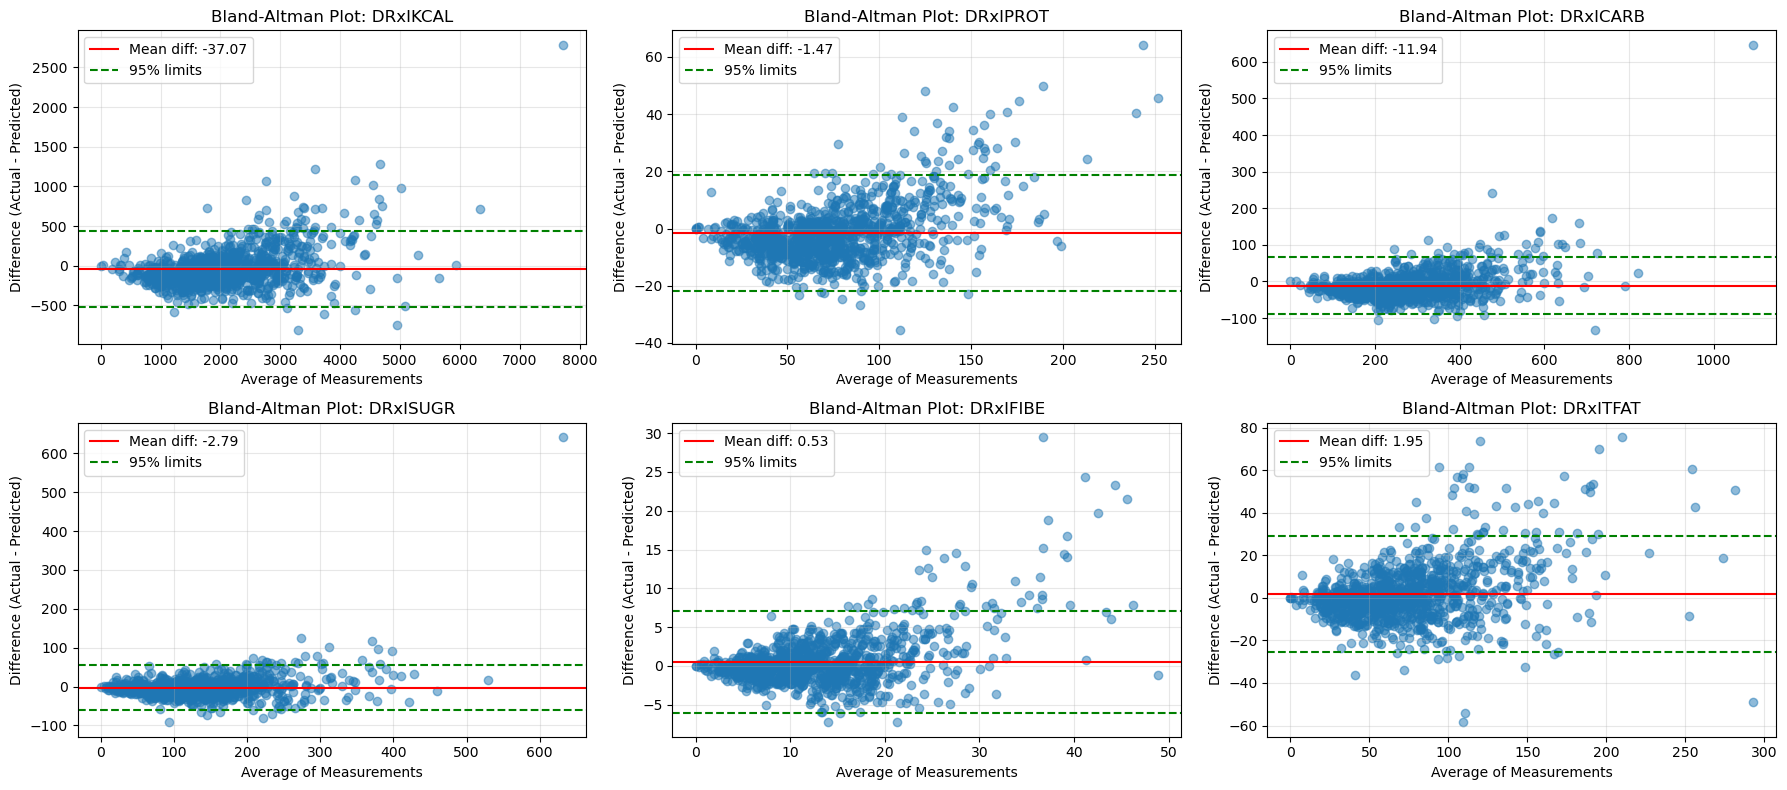

In [13]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()

# Create plots for Lin's CCC.
Ground truth vs fine-tuned mode.


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxIKCAL 0.954167
DRxIPROT 0.950124
DRxITFAT 0.932553
DRxICARB 0.927969
DRxISUGR 0.917326
DRxIFIBE 0.876514

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.9919


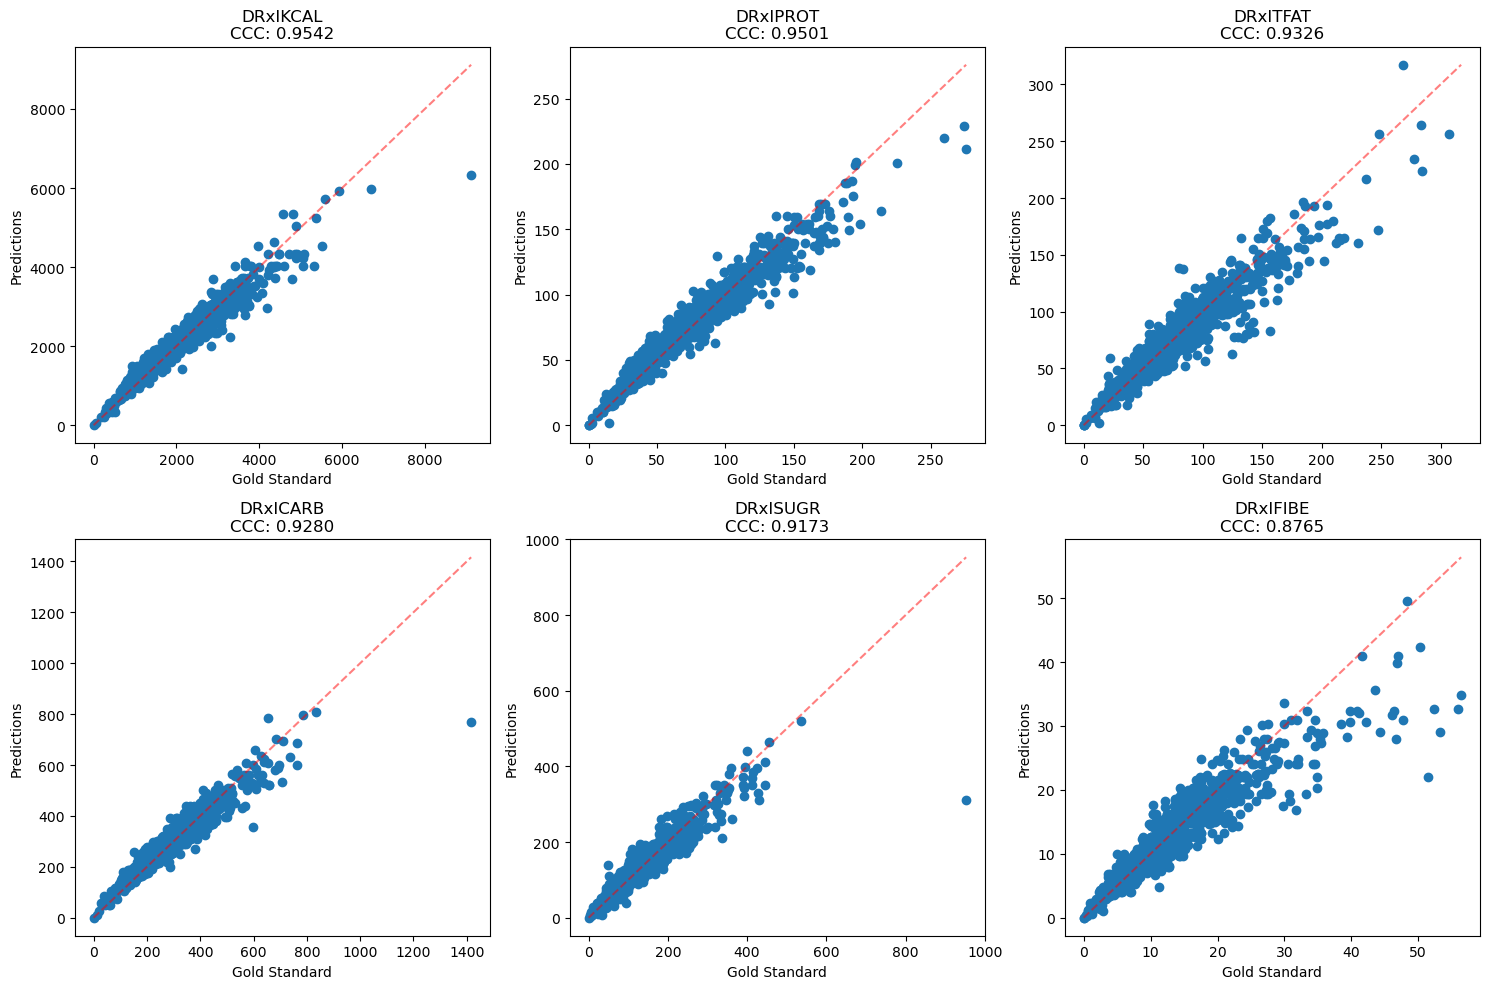

In [14]:
def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                  'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred_ft'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()